# MECANISMO BIELA-MANIVELA INVERTIDA

## PROBLEMAS VELOCIDAD Y ACELERACIÓN

### PASO 1: MATRIZ JACOBIANA 

Para resolver el problema velocidad, necesitamos otra vez la matriz jacobiana. El método de construcción aparece detallado en el notebook Problema_Posición_5B, por lo que para este caso copiaremos el código de los pasos realizados para poder conseguirla.

In [1]:
import numpy as np
import math as math
import array as arr
import pprint  # para depurar
import matplotlib.pyplot as plt  #Para graficas
import matplotlib.animation as animation
import scipy.integrate as integrate 
import os
from time import sleep
#%matplotlib inline (Para notebook)



print ('BIELA-MANIVELA INVERTIDA')
print ('=============================')
# Lectura de datos por teclado

meca = {} # dictionary vacio, con propiedades de mecanismo

meca["L1"] = float (input ('Introduce longitud L1:'))
meca["L2"] = float (input ('Introduce longitud L2:'))
meca["L3"] = float (input ('Introduce longitud L3: '))
meca["theta"] = float (input ('Introduce angulo inicial theta:')) #En rad
meca["beta"] = float (input ('Introduce angulo inicial beta: '))
meca["XB"] = float (input ('Introduce coordenada en x del punto B:'))
meca["YB"] = float (input ('Introduce coordenada en y del punto B:'))
meca["XA"] = 0
meca["YA"] = 0

# Defino posicion inicial:
q = np.array ([[0.1], [0.2], [1], [0.2], [meca["XB"]+meca["L3"]*math.cos(meca["beta"])], [meca["YB"]+meca["L3"]*math.sin(meca["beta"])], [meca["theta"]], [meca["beta"]]])
print('q: ' + str(q))

# JACOBIANO
def jacob_Phiq(q,meca):
    #Inicializa a cero la matriz jacobiana
    Jacob = np.zeros((8,8))

    #Extraer coordenadas

    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]

    #Montar matriz

    Jacob[0,0] = 2*X1
    Jacob[0,1] = 2*Y1
    Jacob[1,0] = -2*(X2-X1)
    Jacob[1,1] = -2*(Y2-Y1)
    Jacob[1,2] = 2*(X2-X1)
    Jacob[1,3] = 2*(Y2-Y1)
    Jacob[2,4] = -2*(meca["XB"]-X3)
    Jacob[2,5] = -2*(meca["YB"]-Y3)
    Jacob[3,0] = -(Y2-Y1) + (Y3-Y1)
    Jacob[3,1] = (X2-X1) - (X3-X1)
    Jacob[3,2] = -(Y3-Y1)
    Jacob[3,3] = X3-X1
    Jacob[3,4] = (Y2-Y1)
    Jacob[3,5] = -(X2-X1)

    if (abs(math.cos(theta)) < 0.95 ):
        Jacob[4,6] = meca["L1"]*math.sin(theta)
        Jacob[4,0] = 1
    else:
        Jacob[4,6] = -meca["L1"]*math.cos(theta)
        Jacob[4,1] = 1


    if (abs(math.cos(beta)) < 0.95 ):
        Jacob[5,7] = meca["L3"]*math.sin(beta)
        Jacob[5,4] = 1
    else:
        Jacob[5,7] = -meca["L3"]*math.cos(beta)
        Jacob[5,5] = 1


    Jacob[6,6] = 1
    Jacob[7,7] = 1

    return Jacob


def Phi (q,meca):
    #Inicializa a cero Phi
    Phi = np.zeros((8,1))

    #Extraer coordenadas
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]

    Phi[0] = X1**2 + Y1**2 - meca["L1"]**2
    Phi[1] = (X2-X1)**2 + (Y2-Y1)**2 - meca["L2"]**2
    Phi[2] = (meca["XB"]-X3)**2 + (meca["YB"]-Y3)**2 - meca["L3"]**2
    Phi[3] = (X3-X1)*(Y2-Y1) - (X2-X1)*(Y3-Y1)
     
    if (abs(math.cos(theta)) < 0.95):
        Phi[4] = X1-meca["L1"]*math.cos(theta)
    else: 
        Phi[4] = Y1-meca["L1"]*math.sin(theta)


    if (abs(math.cos(beta)) < 0.95):
        Phi[5] = (X3-meca["XB"])-meca["L3"]*math.cos(beta)
    else: 
        Phi[5] = (Y3-meca["YB"])-meca["L3"]*math.sin(beta)


    return Phi



def resuelve_prob_posicion(q_init, meca):
    #Inicializacion de variables
    error = 1e10
    tolerancia = 1e-10

    #Inicializacion en cero de deltaQ, fi y q
    deltaQ = np.zeros ((8,1))
    q = q_init
    i=0

    # Iteraciones hasta conseguir que el error sea menor que la tolerancia

    while (error > tolerancia and i<=100):
        #print("q=")
        #pprint.pprint(q)


        #Extraer las coordenadas
        X1 = q[0]
        Y1 = q[1]
        X2 = q[2]
        Y2 = q[3]
        X3 = q[4]
        Y3 = q[5]
        theta = q[6]
        beta = q[7]
       
        fi=Phi(q,meca)

        J = jacob_Phiq(q,meca)
    
        rango = np.linalg.matrix_rank(J, 1e-5)
        
        deltaQ = np.linalg.solve(J,-fi)
        q = q + deltaQ
        error = np.linalg.norm(deltaQ)  # El error es el modulo del vector
        i=i+1
        
    if (error > tolerancia):
        raise Exception ('No se puede alcanzar la posición')

    return q

q = resuelve_prob_posicion(q,meca)

BIELA-MANIVELA INVERTIDA
Introduce longitud L1:2
Introduce longitud L2:3
Introduce longitud L3: 1
Introduce angulo inicial theta:0.5
Introduce angulo inicial beta: 0.8
Introduce coordenada en x del punto B:2
Introduce coordenada en y del punto B:0
q: [[0.1       ]
 [0.2       ]
 [1.        ]
 [0.2       ]
 [2.69670671]
 [0.71735609]
 [0.5       ]
 [0.8       ]]


### PASO 2: PROBLEMA VELOCIDAD

Consiste en determinar las velocidades de todas las variables del mecanismo una vez sabemos su posición $q$ y la velocidad de los grados de libertad. 

Partimos de la ecuación:

$\Phi_q  =0 $

Derivando se obtiene:

$\Phi_q \dot{q} + \Phi_t = 0$

Siendo $\dot{q}$ el vector velocidad, $\Phi_q$ el jacobiano y $\Phi_t$ la derivada parcial de las ecuaciones de restricción respecto al tiempo. Para las ecuaciones de sólido rígido el valor de esta derivada es $0$. Solo tendría un valor no nulo la correspondiente al ángulo, que en ese caso tendría la velocidad que nosotros le indiquemos. 

De este modo la expresión quedaría:

$\Phi_q \dot{q} = -\Phi_t$

Este sistema de ecuaciones tiene infinitas soluciones y por tanto hay que ampliar añadiendo un dato conocido de velocidad, lo que se hace añadiendo una fila a la matriz de coeficientes del lado izquierdo y un dato a la columna del lado derecho de la ecuación por cada grado de libertad.

De esta forma llegamos a un sistema de ecuaciones lineal matricial de la forma:

$\mathbf{A} \mathbf{x} = \mathbf{b}$

Habría que multiplicar en ambas partes de la igualdad por la $A$ invertida en el lado izquierdo, del mismo modo que se hizo en el problema de posición. De esta manera quedaría:



$x = -A^{-1} b$

In [2]:

#PASO 2

def resuelve_prob_velocidad(q,meca):
    
    b = np.zeros ((8,1))
    #Velocidad del gdl. En una vuelta completa del angulo se cumple angulo=2*Pi*t
    b[6]=1
    b[7] = 1
    qp = np.linalg.solve(jacob_Phiq(q,meca),b)
    #print ("qp=")
    #pprint.pprint(qp)
 
    return qp

resuelve_prob_velocidad (q,meca)

array([[-0.95885108],
       [ 1.75516512],
       [-1.69901853],
       [-1.13060259],
       [-0.71735609],
       [ 0.69670671],
       [ 1.        ],
       [ 1.        ]])

### PASO 3: PROBLEMA ACELERACIÓN

El problema aceleración trata de determinar las aceleraciones de todas las variables del mecanismo, conociendo la posición$q$, la velocidad $\dot{q}$ y las aceleraciones de los grados de libertad. 

Partimos la ecuación que se obtiene tras derivar la ecuación inicial para el problema de velocidad, es decir:

$\Phi_q \dot{q} + \Phi_t = 0$

Se deriva por segunda vez:

$\dot{\Phi}_q \dot{q} + \Phi_q \ddot{q} + \dot{\Phi}_t = 0$

Despejamos $\Phi_q \ddot{q}$:

$\Phi_q \ddot{q} = -\dot{\Phi}_t - \dot{\Phi}_q  \dot{q}$


Siendo $\Phi_q$ el jacobiano, $\ddot{q}$ el vector aceleración, $\dot{q}$ el vector velocidad, $\dot{\Phi}_q$ la derivada del jacobiano respecto al tiempo y $\dot{\Phi}_t$ es la derivada de las ecuaciones de restricción con respecto al tiempo, cuyo valor es nulo. Es decir, tendríamos:

$\Phi_q \ddot{q} = - \dot{\Phi}_q  \dot{q}$

Del mismo modo que en el problema velocidad, llamando $b$ al conjunto formado por $\dot{\Phi}_q  \dot{q}$  llegamos a un sistema de ecuaciones lineal matricial:

$ \mathbf{A} \mathbf{x} = \mathbf{b}$

Y despejando la $x$:

$\mathbf{x} = \mathbf{A}^{-1} \mathbf{b}$


El vector velocidad será:

\begin{equation}
\mathbf{q_p} = 
\begin{bmatrix}
\dot{X}_1 \\
\dot{Y}_1 \\
\dot{X}_2 \\
\dot{Y}_2 \\
\dot{X}_3 \\
\dot{Y}_3 \\
\dot{\theta}\\
\dot{\beta} \\
\end{bmatrix}
\end{equation}

Por otro lado, para calcular la derivada del jacobiano solo tenemos en cuenta las filas que hacen referencia a las ecuaciones de las coordenadas independientes, ya que la última que añadimos para poder realizar los cálculos era adicional. Teniendo en cuenta esto, la derivada del jacobiano sería:

\begin{equation}
\mathbf{\dot{\Phi}_q} = 
\begin{bmatrix}
2 \dot{X}_1 & 2 \dot{Y}_1 & 0 & 0 & 0 & 0 & 0 & 0  \\
-2( \dot{X}_2 - \dot{X}_1) & -2( \dot{Y}_2 - \dot{Y}_1) & 2( \dot{X}_2 - \dot{X}_1) & 2( \dot{Y}_2 - \dot{Y}_1) & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 2X_3q & 2Y_3q & 0 & 0   \\
-( \dot{Y}_2 - \dot{Y}_1) + ( \dot{Y}_3 - \dot{Y}_1) & (\dot{X}_2 - \dot{X}_1) - (\dot{X}_3 - \dot{X}_1) & -\dot{Y}_3 - \dot{Y}_1& \dot{X}_3 - \dot{X}_1q & \dot{Y}_2 - \dot{Y}_1 & -(\dot{X}_2 - \dot{X}_1) & 0 & 0\\
\dot{\theta}_q(4) \\
\dot{\theta}_q(5)\\
\end{bmatrix}
\end{equation}

Siendo:

1. $Si ~~ \cos (\theta) < {0.95} \rightarrow \dot{\Phi}_q(4) = \dot{\theta} · L_1 · \cos(\theta)$

2. $Si ~~ \cos (\theta) > {0.95} \rightarrow \dot{\Phi}_q(4) =  \dot{\theta} · L_1 · \sin(\theta)$

3. $Si ~~ \cos (\beta) < {0.95} \rightarrow \dot{\Phi}_q(5) = \dot{\beta} · L_3 · \cos(\beta)$

4. $Si ~~ \cos (\beta) > {0.95} \rightarrow \dot{\Phi}_q(5) = \dot{\beta} · L_3 · \sin(\beta)$


Como ya tenemos $\dot{\Phi}_q$ y $\dot{q}$, podemos calcular $b$. Las dos  últimas filas que añadimos son los valores de las aceleraciones angulares, datos que sabemos de antemano. 

\begin{equation}
\mathbf{b} = 
\begin{bmatrix}
2\dot{X}_1^2 & 2\dot{Y}_1^2 & 0 & 0 & 0 & 0 & 0 & 0  \\
-2\dot{X}_1 (\dot{X}_2-\dot{X}_1) & -2\dot{Y}_1 (\dot{Y}_2-\dot{Y}_1) & 2\dot{X}_2(\dot{X}_2-\dot{X}_1) & 2\dot{Y}_2(\dot{Y}_2-\dot{Y}_1) & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 2X_3q^2 & 2Y_3q^2 & 0 & 0   \\
-\dot{X}_1((\dot{Y}_2-\dot{Y}_1)+(\dot{Y}_3-\dot{Y}_1)) & \dot{Y}_1((\dot{X}_2-\dot{X}_1)-(\dot{X}_3-\dot{X}_1)) & \dot{X}_2(-\dot{Y}_3-\dot{Y}_1) & \dot{Y}_2(\dot{X}_3-\dot{X}_1) & \dot{X}_3(\dot{Y}_2-\dot{Y}_1) & \dot{Y}_3(-(\dot{X}_2-\dot{X}_1)) & 0 & 0\\
b(4) \\
b(5)\\
1\\
1\\
\end{bmatrix}
\end{equation}

1. $Si ~~ \cos (\theta) < {0.95} \rightarrow b(4) = \dot{\theta}^2 · L_1 · \cos(\theta)$

2. $Si ~~ \cos (\theta) > {0.95} \rightarrow b(4) =  \dot{\theta}^2 · L_1 · \sin(\theta)$

3. $Si ~~ \cos (\beta) < {0.95} \rightarrow b(5) = \dot{\beta}^2 · L_3 · \cos(\beta)$

4. $Si ~~ \cos (\beta) > {0.95} \rightarrow b(5) = \dot{\beta}^2 · L_3 · \sin(\beta)$


In [3]:
#PASO 3

def resuelve_prob_aceleracion (q,meca):

    b=np.zeros ((8,1))
    qp = resuelve_prob_velocidad (q,meca)

    #Extraer las posiciones
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    X3 = q[4]
    Y3 = q[5]
    theta = q[6]
    beta = q[7]
    #Extraer las velocidades
    X1q = qp[0]
    Y1q = qp[1]
    X2q = qp[2]
    Y2q = qp[3]
    X3q = qp[4]
    Y3q = qp[5]
    thetaq = qp[6]
    betaq = qp[7]
    
    b[0] = 2*(X1q)**2 + 2*(Y1q)**2
    b[1] = -2*X1q*(X2q-X1q) - 2*Y1q*(Y2q-Y1q) + 2*X2q*(X2q*X1q) + 2*Y2q*(Y2q*Y1q)
    b[2] = -2*X3q*(-X3q) + 2*X3q*Y3q 
    b[3] = -2*X1q*((Y2q-Y1q)+(Y3q-Y1q)) + Y1q*((X2q-X1q)-(X3q-X1q)) + X2q*(-Y3q-Y1q) + Y2q*(X3q-X1q) + X3q*(Y2q-Y1q) -Y3q*(X2q-X1q)
    
    if (abs(math.cos(theta)) < 0.95 ):
        b[4] = thetaq**2 * (meca["L1"] * math.cos(theta))
    else: 
        b[4] = thetaq**2 * (meca["L1"] * math.sin(theta))
    
    if (abs(math.cos(beta)) < 0.95 ):
        b[5] = betaq**2 * (meca["L3"] * math.cos(beta))
    else: 
        b[5] = betaq**2 * (meca["L3"] * math.sin(beta))
    b[6] = 1 #Aceleracion conocida 
    b[7] = 1
    qpp = np.linalg.solve(-jacob_Phiq(q,meca),b)

     
    return qpp

resuelve_prob_aceleracion(q, meca)

array([[-0.79631405],
       [-2.7140162 ],
       [ 0.82578182],
       [ 8.75010809],
       [ 0.02064938],
       [-0.04070436],
       [-1.        ],
       [-1.        ]])

### PASO 4: GRÁFICAS DE VELOCIDADES

Vamos a representar por separado la gráfica de la velocidad en cada coordenada $(X_1, ~ Y_1, ~ X_2, ~ Y_2, ~ X_3 ~ e ~ Y_3)$.

VX1=
array([-1.09260498, -1.08363467, -1.05687102, -0.75053568, -0.98143719,
       -1.19622346, -1.39136769, -1.56366558, -1.71028801, -1.82882743,
       -1.91733741, -1.97436462, -1.99897266, -1.99075748, -1.94985396,
       -1.87693374, -1.77319417, -1.64033868, -1.48054874, -1.29644811,
       -1.09105975, -0.86775613, -0.63020391,  1.07245786,  1.09036061,
        1.09035958,  1.07245479,  0.6302318 ,  0.86778261,  1.09108438,
        1.29647049,  1.48056849,  1.64035549,  1.77320777,  1.87694389,
        1.94986049,  1.9907603 ,  1.99897172,  1.97435993,  1.91732905,
        1.82881554,  1.71027278,  1.56364726,  1.39134658,  1.19619991,
        0.98141159,  0.75050844, -1.05687509, -1.08363672, -1.09260498])


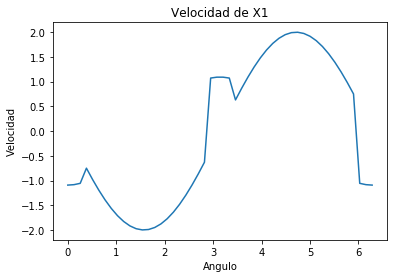

In [4]:
#PASO 4: VELOCIDAD DE X1

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VX1 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VX1 = np.append(VX1, qp[0])

        i=i+1
      
    print ("VX1=")
    pprint.pprint(VX1)
 
    plt.plot(th,VX1)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de X1')

    plt.show()
    return 

grafica_velocidad (q,meca)

VY1=
array([ 2.        ,  1.98357995,  1.93458942,  1.37384634,  1.79650873,
        2.18967236,  2.54688147,  2.86227065,  3.13066121,  3.34764616,
        3.50966259,  3.61405019,  3.65909492,  3.64405712,  3.56918373,
        3.43570416,  3.24581016,  3.00261981,  2.71012628,  2.37313236,
        1.99717148,  1.58841694,  1.15358053, -1.96312095, -1.99589171,
       -1.99588982, -1.96311533, -1.15363158, -1.58846541, -1.99721656,
       -2.37317331, -2.71016245, -3.00265058, -3.24583504, -3.43572274,
       -3.56919569, -3.64406228, -3.65909319, -3.61404161, -3.50964729,
       -3.34762438, -3.13063332, -2.86223711, -2.54684283, -2.18962926,
       -1.79646187, -1.37379648,  1.93459688,  1.98358371,  2.        ])


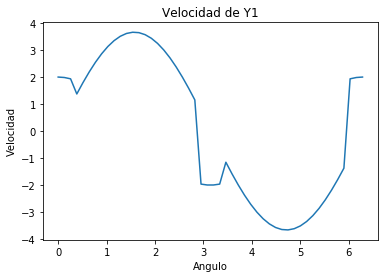

In [5]:
#PASO 4: VELOCIDAD DE Y1

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VY1 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VY1 = np.append(VY1, qp[1])

        i=i+1
      
    print ("VY1=")
    pprint.pprint(VY1)
 
    plt.plot(th,VY1)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de Y1')

    plt.show()
    return 

grafica_velocidad (q,meca)

VX2=
array([-1.82336336, -1.8083935 , -1.76372973, -1.42876566, -1.86832393,
       -2.27720422, -2.64869271, -2.97668953, -3.25580897, -3.48146786,
       -3.64996088, -3.75852136, -3.80536674, -3.78972781, -3.71186136,
       -3.57304597, -3.37556099, -3.12264913, -2.81846322, -2.467998  ,
       -2.07700814, -1.6519137 , -1.19969475,  1.7897414 ,  1.8196179 ,
        1.81961619,  1.78973628,  1.19974784,  1.6519641 ,  2.07705502,
        2.4680406 ,  2.81850083,  3.12268113,  3.37558686,  3.57306529,
        3.71187381,  3.78973318,  3.80536495,  3.75851244,  3.64994496,
        3.48144522,  3.25577997,  2.97665465,  2.64865252,  2.27715939,
        1.86827519,  1.42871381, -1.76373653, -1.80839693, -1.82336336])


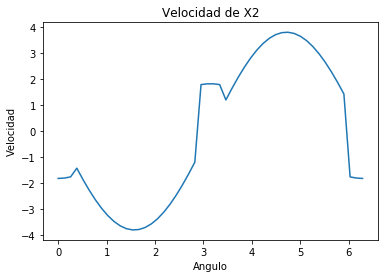

In [6]:
#PASO 4: VELOCIDAD DE X2

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VX2 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VX2 = np.append(VX2, qp[2])

        i=i+1
      
    print ("VX2=")
    pprint.pprint(VX2)
 
    plt.plot(th,VX2)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de X2')

    plt.show()
    return 

grafica_velocidad (q,meca)

VY2=
array([-0.84908359, -0.84211259, -0.82131406, -1.27043935, -1.66128869,
       -2.02485959, -2.35518219, -2.64683259, -2.89502186, -3.09567474,
       -3.24549648, -3.34202701, -3.3836813 , -3.36977537, -3.30053756,
       -3.17710477, -3.00150376, -2.77661791, -2.50613986, -2.19451087,
       -1.8468479 , -1.4688596 , -1.06675256,  0.83342689,  0.84733945,
        0.84733865,  0.83342451,  1.06679976,  1.46890442,  1.84688959,
        2.19454875,  2.5061733 ,  2.77664637,  3.00152677,  3.17712195,
        3.30054863,  3.36978015,  3.3836797 ,  3.34201907,  3.24548233,
        3.0956546 ,  2.89499608,  2.64680157,  2.35514646,  2.02481972,
        1.66124535,  1.27039325, -0.82131723, -0.84211419, -0.84908359])


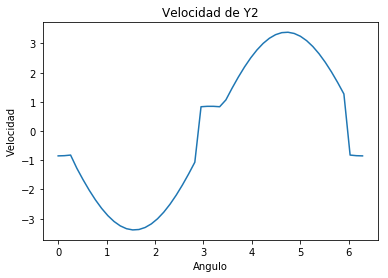

In [7]:
#PASO 4: VELOCIDAD DE Y2

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VY2 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VY2 = np.append(VY2, qp[3])

        i=i+1
      
    print ("VY2=")
    pprint.pprint(VY2)
 
    plt.plot(th,VY2)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de Y2')

    plt.show()
    return 

grafica_velocidad (q,meca)

VX3=
array([-1.02963856, -1.0211852 , -0.99596393, -0.37526784, -0.4907186 ,
       -0.59811173, -0.69568384, -0.78183279, -0.85514401, -0.91441372,
       -0.95866871, -0.98718231, -0.99948633, -0.99537874, -0.97492698,
       -0.93846687, -0.88659709, -0.82016934, -0.74027437, -0.64822406,
       -0.54552988, -0.43387807, -0.31510196,  1.01065251,  1.02752353,
        1.02752256,  1.01064962,  0.3151159 ,  0.4338913 ,  0.54554219,
        0.64823524,  0.74028425,  0.82017774,  0.88660388,  0.93847194,
        0.97493025,  0.99538015,  0.99948586,  0.98717996,  0.95866453,
        0.91440777,  0.85513639,  0.78182363,  0.69567329,  0.59809996,
        0.49070579,  0.37525422, -0.99596777, -1.02118713, -1.02963856])


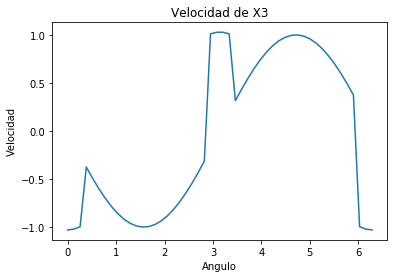

In [8]:
#PASO 4: VELOCIDAD DE X3

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VX3 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VX3 = np.append(VX3, qp[4])

        i=i+1
      
    print ("VX3=")
    pprint.pprint(VX3)
 
    plt.plot(th,VX3)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de X3')

    plt.show()
    return 

grafica_velocidad (q,meca)

VY3=
array([ 1.        ,  0.99178998,  0.96729471,  0.3644656 ,  0.47659307,
        0.58089485,  0.67565831,  0.75932742,  0.83052834,  0.88809195,
        0.93107304,  0.95876587,  0.97071572,  0.96672636,  0.94686332,
        0.91145273,  0.86107604,  0.79656044,  0.71896528,  0.62956467,
        0.52982658,  0.42138871,  0.30603162, -0.98156048, -0.99794585,
       -0.99794491, -0.98155767, -0.30604516, -0.42140157, -0.52983854,
       -0.62957553, -0.71897487, -0.7965686 , -0.86108264, -0.91145765,
       -0.94686649, -0.96672773, -0.97071526, -0.9587636 , -0.93106898,
       -0.88808618, -0.83052095, -0.75931852, -0.67564805, -0.58088341,
       -0.47658063, -0.36445238,  0.96729844,  0.99179185,  1.        ])


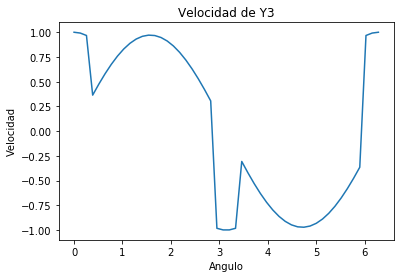

In [9]:
#PASO 4: VELOCIDAD DE Y3

def grafica_velocidad(q,meca):
    
    th = np.linspace(0,2*3.1416,50)

    VY3 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qp = resuelve_prob_velocidad (q,meca)

        qp[6] = 1  #inicializar qp en 0 con qp[4] = 1 rad/s
        qp[7] = 1

        resuelve_prob_velocidad(q,meca)
    
        VY3 = np.append(VY3, qp[5])

        i=i+1
      
    print ("VY3=")
    pprint.pprint(VY3)
 
    plt.plot(th,VY3)
    plt.xlabel ('Angulo')
    plt.ylabel ('Velocidad')
    plt.title ('Velocidad de Y3')

    plt.show()
    return 

grafica_velocidad (q,meca)

### PASO 5: GRÁFICAS ACELERACIONES

Haremos el mismo procedimiento que para la velocidad, representando en celdas separadas la aceleración de cada coordenada.

AX1=
array([-1.86653862, -1.68739956, -1.4347336 , -1.10329716, -0.76119904,
       -0.40660199, -0.04532851,  0.31668926,  0.67350698,  1.01926568,
        1.34828799,  1.65517134,  1.9348767 ,  2.18281129,  2.39490401,
        2.56767229,  2.69827926,  2.78458036,  2.82515851,  2.81934742,
        2.7672425 ,  2.66969933,  2.52831957, -3.71462374, -3.96736407,
       -4.10736469, -4.13232706,  1.26787459,  0.93414784,  0.58508234,
        0.22640976, -0.13598047, -0.49613791, -0.84814873, -1.18623291,
       -1.50483909, -1.79873574, -2.06309705, -2.29358222, -2.48640665,
       -2.63840416, -2.74707894, -2.81064656, -2.82806322, -2.79904294,
       -2.72406224, -2.60435231, -1.98902512, -1.96683171, -1.86652257])


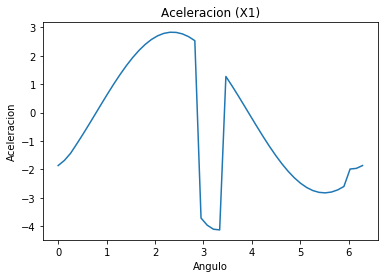

In [10]:
#PASO 5: ACELERACION DE X1

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    AX1 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AX1 = np.append(AX1, qpp[0])

        i=i+1
      
    print ("AX1=")
    pprint.pprint(AX1)	
 
    plt.plot(th,AX1)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (X1)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)

AY1=
array([ -2.        ,  -2.23933487,  -2.44189975,  -0.53635949,
        -2.97713864,  -5.74850687,  -8.70098643, -11.67385169,
       -14.50511032, -17.04156623, -19.14831484, -20.7170581 ,
       -21.67270383, -21.97782572, -21.63469949, -20.68478897,
       -19.20572162, -17.30595647, -15.11749746, -12.78713185,
       -10.46676909,  -8.30351286,  -6.43011567,   1.58081723,
         1.86776563,   2.12404523,   2.3454479 ,  -4.12304611,
        -5.12681566,  -6.47259556,  -8.04105456,  -9.69743434,
       -11.30089223, -12.71424743, -13.81348445, -14.49638333,
       -14.68970375, -14.35444487, -13.48882916, -12.12880792,
       -10.34604909,  -8.24353336,  -5.94904189,  -3.60695819,
        -1.36891744,   0.61608639,   2.21148903,  -1.42731497,
        -1.72785793,  -2.00002939])


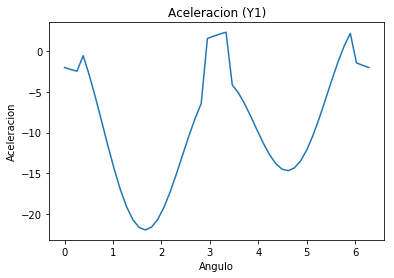

In [11]:
#PASO 5: ACELERACION DE Y1

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AY1 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AY1 = np.append(AY1, qpp[1])

        i=i+1
      
    print ("AY1=")
    pprint.pprint(AY1)	
 
    plt.plot(th,AY1)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (Y1)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)

AX2=
array([-1.22056352, -0.95830221, -0.6434872 , -0.49398529,  1.18125242,
        2.97269194,  4.78486111,  6.53466057,  8.15404382,  9.59034571,
       10.80479684, 11.76999475, 12.46718845, 12.88416182, 13.01429144,
       12.85704345, 12.41981692, 11.72070017, 10.79143965,  9.67977746,
        8.45032045,  7.18326634,  5.9706097 , -5.7242918 , -6.14162997,
       -6.37526635, -6.42136515,  3.83326572,  4.5634971 ,  5.65594472,
        7.0248079 ,  8.55173428, 10.09548282, 11.50466066, 12.63223158,
       13.35021898, 13.56294669, 13.21728976, 12.30873257, 10.88251212,
        9.02969886,  6.87866173,  4.58290009,  2.30663437,  0.20977768,
       -1.56606551, -2.90910828, -1.5684852 , -1.42461642, -1.22053673])


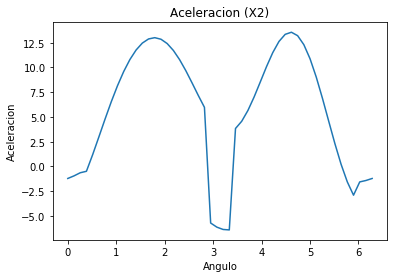

In [12]:
#PASO 5: ACELERACION DE X2

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AX2 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AX2 = np.append(AX2, qpp[2])

        i=i+1
      
    print ("AX2=")
    pprint.pprint(AX2)	
 
    plt.plot(th,AX2)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (X2)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)

AY2=
array([ 4.15323034,  4.20227156,  4.13379496,  6.94977059, 13.81852733,
       21.79586418, 30.39229904, 39.07504638, 47.30293991, 54.56225286,
       60.40093971, 64.45889717, 66.49209776, 66.38887084, 64.1771629 ,
       60.0222583 , 54.21513196, 47.1522823 , 39.30850197, 31.20453781,
       23.37193341, 16.31751356, 10.48995163,  2.85865222,  2.85862112,
        2.74981266,  2.53401385,  8.28972966, 13.20500832, 19.3302967 ,
       26.23131829, 33.42574062, 40.41486135, 46.71596718, 51.89335901,
       55.58616449, 57.53128702, 57.58014996, 55.7082682 , 52.01709605,
       46.72804172, 40.16898438, 32.75406143, 24.95789071, 17.2857365 ,
       10.24139875,  4.29478452,  3.70308455,  3.98514021,  4.15324281])


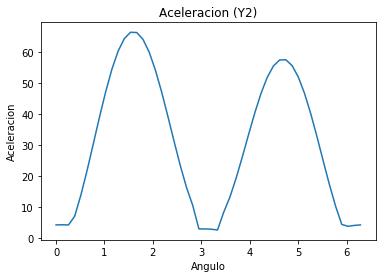

In [13]:
#PASO 5: ACELERACION DE Y2

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AY2 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AY2 = np.append(AY2, qpp[3])

        i=i+1
      
    print ("AY2=")
    pprint.pprint(AY2)	
 
    plt.plot(th,AY2)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (Y2)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)

AX3=
array([ 0.98583677,  1.10976725,  1.21615353, -0.55164858, -0.38059952,
       -0.20330099, -0.02266426,  0.15834463,  0.33675349,  0.50963284,
        0.67414399,  0.82758567,  0.96743835,  1.09140564,  1.197452  ,
        1.28383614,  1.34913963,  1.39229018,  1.41257925,  1.40967371,
        1.38362125,  1.33484967,  1.26415978, -0.8560365 , -1.00518378,
       -1.13712137, -1.24968287,  0.63393729,  0.46707392,  0.29254117,
        0.11320488, -0.06799024, -0.24806895, -0.42407437, -0.59311646,
       -0.75241955, -0.89936787, -1.03154853, -1.14679111, -1.24320332,
       -1.31920208, -1.37353947, -1.40532328, -1.41403161, -1.39952147,
       -1.36203112, -1.30217615,  0.69382541,  0.8464489 ,  0.9858519 ])


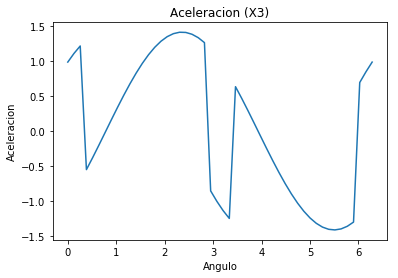

In [14]:
#PASO 5: ACELERACION DE X3

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AX3 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AX3 = np.append(AX3, qpp[4])

        i=i+1
      
    print ("AX3=")
    pprint.pprint(AX3)	
 
    plt.plot(th,AX3)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (X3)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)

AY3=
array([-1.        , -1.11966743, -1.22094987,  0.53011822,  0.35998102,
        0.18309393,  0.00259132, -0.17831479, -0.35640368, -0.5285152 ,
       -0.6916171 , -0.84286828, -0.97967611, -1.09974615, -1.20112295,
       -1.28222113, -1.34184617, -1.37920514, -1.39390748, -1.38595686,
       -1.35573509, -1.30397941, -1.23175463,  0.79040862,  0.93388282,
        1.06202261,  1.17272395, -0.6196737 , -0.4611834 , -0.29606273,
       -0.12680799,  0.04404264,  0.21393505,  0.38032467,  0.54070226,
        0.69262051,  0.83372204,  0.96176917,  1.07467546,  1.17053893,
        1.24767641,  1.30465834,  1.34034289,  1.35390819,  1.34488129,
        1.31316223,  1.25904197, -0.71365749, -0.86392897, -1.00001469])


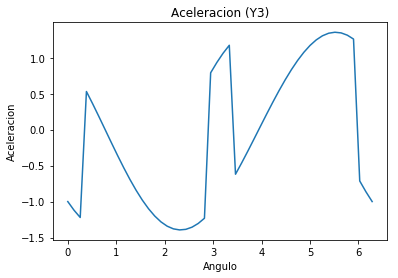

In [15]:
#PASO 5: ACELERACION DE Y3

def grafica_aceleracion(q,meca):
    
    th = np.linspace(0,2*3.1416,50)
    
    AY3 = np.zeros((50,0))

    
    i=0
    for t in th:

        q[6] = t
        q[7] = t
        
        resuelve_prob_posicion (q,meca)
        qpp = resuelve_prob_aceleracion(q,meca)

        qpp[6] = 1  #inicializar qp en 0 con qpp[6] = 1 rad/s**2
        qpp[7] = 1

        resuelve_prob_aceleracion(q,meca)
        
        
        AY3 = np.append(AY3, qpp[5])

        i=i+1
      
    print ("AY3=")
    pprint.pprint(AY3)	
 
    plt.plot(th,AY3)
    plt.xlabel ('Angulo')
    plt.ylabel ('Aceleracion')
    plt.title ('Aceleracion (Y3)')	

    plt.show()
    return 

grafica_aceleracion (q,meca)